In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from rdkit import Chem

def is_unbalanced(rxn):
    reactants, product = rxn.split('>>')
    pmaps = [atom.GetAtomMapNum() for atom in Chem.MolFromSmiles(product).GetAtoms()]
    rmaps = [atom.GetAtomMapNum() for atom in Chem.MolFromSmiles(reactants).GetAtoms()]
    return sum([pmap not in rmaps for pmap in pmaps]) > 0

def no_product(rxn):
    return rxn.split('>>')[1] == ''

In [2]:
df = pd.read_csv('raw_data.csv')

passed_id = []
passed_rxns = []

problematic_rxns = {'unbalanced rxn': [], 'no product': [], 'repeated': []}
unbalanced_cnt = 0
no_product_cnt = 0
repeated_cnt = 0
problematic_cnt = 0

for i, rxn in tqdm(enumerate(df['mapped_rxn']), total=len(df)):
    if is_unbalanced(rxn):
        problematic_rxns['unbalanced rxn'].append(rxn)
        unbalanced_cnt += 1
        problematic_cnt += 1
    elif no_product(rxn):
        problematic_rxns['no product'].append(rxn)
        no_product_cnt += 1
        problematic_cnt += 1
    elif rxn in passed_rxns:
        problematic_rxns['repeated'].append(rxn)
        repeated_cnt += 1
        problematic_cnt += 1
    else:
        passed_id.append(i)
        passed_rxns.append(rxn)
print ('# of problematic reactions: %d (unbalanced: %d, no product: %d, repeated: %d)' % (problematic_cnt, unbalanced_cnt, no_product_cnt, repeated_cnt))

100%|████████████████████████████████████████████████████████████████████████████| 1851/1851 [00:00<00:00, 4555.05it/s]

# of problematic reactions: 93 (unbalanced: 90, no product: 1, repeated: 2)


In [3]:
def show_mols(rxns):
    return Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for rxn in rxns for smi in rxn.split('>>')], molsPerRow=2, subImgSize=(400, 400))

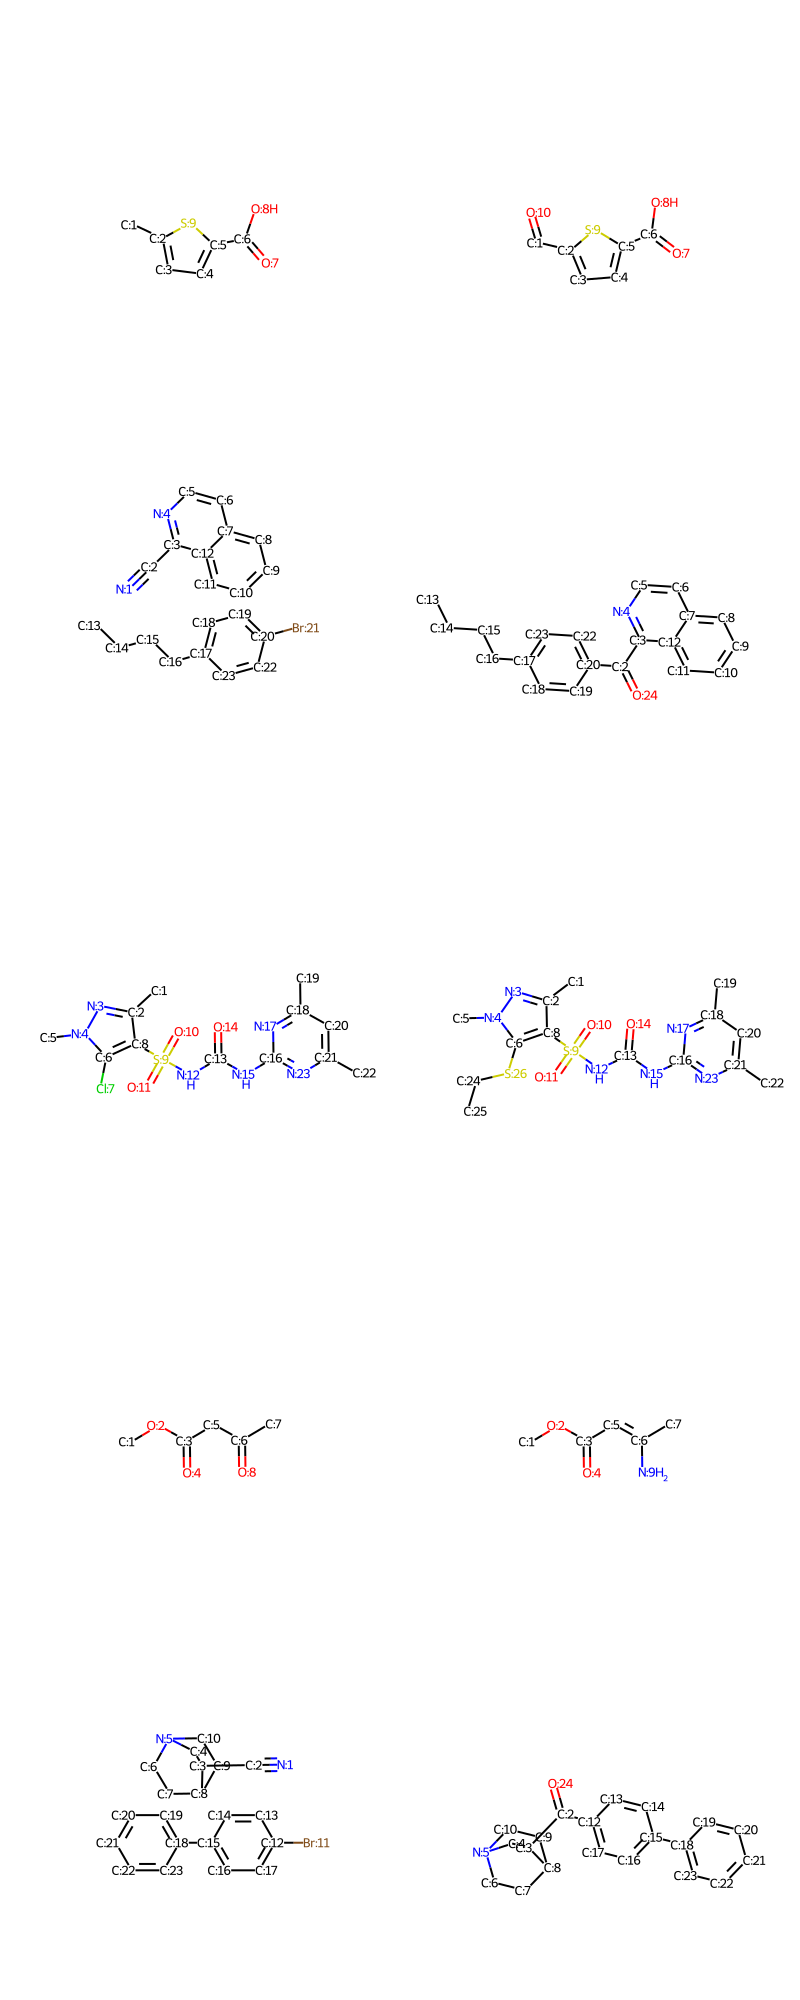

In [4]:
problem = 'unbalanced rxn'
rxns = np.random.choice(problematic_rxns[problem], 5)
show_mols(rxns)

In [5]:
fixed_df = pd.DataFrame({'original_id': passed_id, 'mapped_rxn': passed_rxns})
fixed_df.to_csv('test_data.csv', index=None)